### import section

In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Neccessary Data

In [441]:
sect1  = pd.read_csv('cleaned_0_8.csv')
sect1.head()
sect1 = sect1.drop(['Unnamed: 0.1', 'Unnamed: 0', 'UTM_Easting', 'UTM_Northing','neighborhood_slug'], axis=1)
sect1

,cat3_slug,city_slug
0,villa,karaj
1,apartment-sell,tehran
2,apartment-rent,tehran
3,office-rent,tehran
4,apartment-sell,mashhad
...,...,...
999993,apartment-sell,kermanshah
999994,apartment-rent,tehran
999995,house-villa-sell,yazd
999996,suite-apartment,bandar-anzali


In [443]:
### property features
sect2_1 = pd.read_csv('cleaned_23_42 (1).csv')
sect2_1 = sect2_1[['floor','total_floors_count','unit_per_floor','construction_year','rooms_count']]
### Land Size
sect2_2 = pd.read_csv('land_data_cleaned.csv', index_col=0)
sect2_2 = sect2_2.drop(['Unnamed: 0', 'Improvements','cat3_slug'], axis =1 )
sect2 = pd.concat([sect2_1,sect2_2],axis=1)
sect2

,floor,total_floors_count,unit_per_floor,construction_year,rooms_count,Land
0,NaN,NaN,NaN,NaN,3.0,NaN
1,3.0,NaN,NaN,1384.0,1.0,60.0
2,3.0,NaN,NaN,1401.0,3.0,132.0
3,4.0,NaN,NaN,1400.0,1.0,90.0
4,4.0,6.0,NaN,1403.0,2.0,115.0
...,...,...,...,...,...,...
999995,4.0,NaN,NaN,1403.0,4.0,180.0
999996,1.0,NaN,NaN,1403.0,2.0,110.0
999997,NaN,NaN,NaN,1369.0,4.0,200.0
999998,NaN,NaN,NaN,NaN,2.0,70.0


In [236]:
sect2.Land.describe()

count    942628.000000
mean        311.320180
std        3236.754672
min           2.000000
25%          75.000000
50%         108.000000
75%         180.000000
max      265000.000000
Name: Land, dtype: float64

In [446]:
#totalprice = pd.read_csv('../../processed data/total_price_log.csv', index_col=0) 
totalprice = pd.read_csv('../../processed data/total_price.csv', index_col=0) 
totalprice

,total_price
0,1.162500e+10
1,8.500000e+09
2,8.083333e+09
3,1.162500e+10
4,5.750000e+09
...,...
999995,7.470000e+09
999996,1.162500e+10
999997,3.200000e+09
999998,1.162500e+10


### merging all of sections

In [435]:
df = pd.concat([sect1,sect2,totalprice['total_price']], axis=1)
df

,cat3_slug,city_slug,floor,total_floors_count,unit_per_floor,construction_year,rooms_count,Land,total_price
0,villa,karaj,NaN,NaN,NaN,NaN,3.0,NaN,1.162500e+10
1,apartment-sell,tehran,3.0,NaN,NaN,1384.0,1.0,60.0,8.500000e+09
2,apartment-rent,tehran,3.0,NaN,NaN,1401.0,3.0,132.0,8.083333e+09
3,office-rent,tehran,4.0,NaN,NaN,1400.0,1.0,90.0,1.162500e+10
4,apartment-sell,mashhad,4.0,6.0,NaN,1403.0,2.0,115.0,5.750000e+09
...,...,...,...,...,...,...,...,...,...
999995,house-villa-sell,yazd,4.0,NaN,NaN,1403.0,4.0,180.0,7.470000e+09
999996,suite-apartment,bandar-anzali,1.0,NaN,NaN,1403.0,2.0,110.0,1.162500e+10
999997,apartment-rent,tehran,NaN,NaN,NaN,1369.0,4.0,200.0,3.200000e+09
999998,NaN,NaN,NaN,NaN,NaN,NaN,2.0,70.0,1.162500e+10


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cat3_slug           999997 non-null  object 
 1   city_slug           999998 non-null  object 
 2   floor               541748 non-null  float64
 3   total_floors_count  304352 non-null  float64
 4   unit_per_floor      302283 non-null  float64
 5   construction_year   815828 non-null  float64
 6   rooms_count         845899 non-null  float64
 7   Land                942628 non-null  float64
 8   total_price         936712 non-null  float64
dtypes: float64(7), object(2)
memory usage: 68.7+ MB


### Data preperation

در این بخش بر روی ستون هایی که برای آموزش نیازهستند یکسری اعمال انجام میدهیم

#### rooms_count

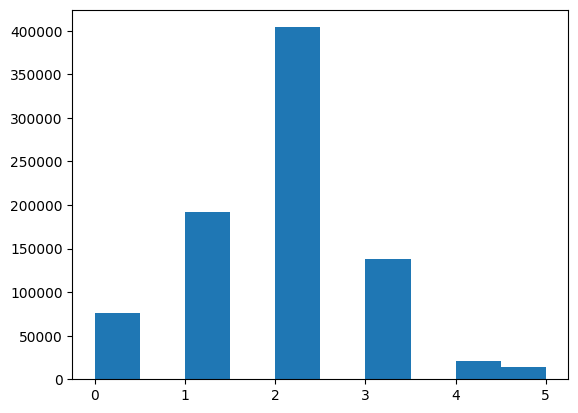

In [368]:
plt.hist(df["rooms_count"])
plt.show()

In [370]:
median_room = df["rooms_count"].median()
print(median_room)
df["rooms_count"] = df["rooms_count"].fillna(median_room)
#df["rooms_count"]

2.0


#### cat3_slug & city_slug	

با توجه به آبجکت بودن این ستون ها ما نیاز داریم برای آموزش آنها به اعداد انکود کنیم 

In [372]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['city_slug'] = le.fit_transform(df['city_slug'].astype(str))
df['cat3_slug'] = le.fit_transform(df['cat3_slug'].astype(str))

In [149]:
df.head()

,cat3_slug,city_slug,floor,total_floors_count,unit_per_floor,construction_year,rooms_count,Land,total_price
0,15,181,NaN,NaN,NaN,NaN,3.0,NaN,4.207317e+10
1,1,397,3.0,NaN,NaN,1384.0,1.0,60.0,8.500000e+09
2,0,397,3.0,NaN,NaN,1401.0,3.0,132.0,8.083333e+09
3,7,397,4.0,NaN,NaN,1400.0,1.0,90.0,2.058333e+10
4,1,251,4.0,6.0,NaN,1403.0,2.0,115.0,5.750000e+09


#### construction_year to age

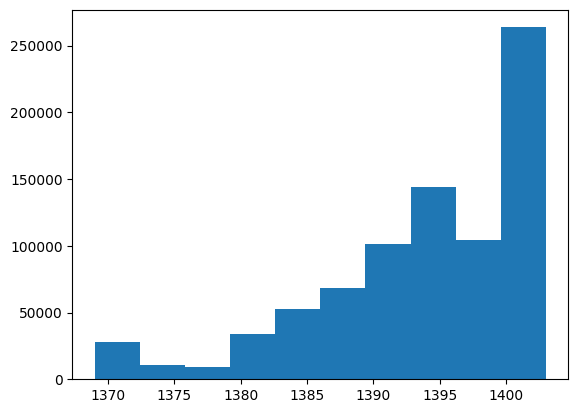

In [374]:
plt.hist(df["construction_year"])
plt.show()

In [376]:
df['age'] = 1403 - df["construction_year"]
df['age'].describe()

count    815828.000000
mean          9.222828
std           8.349677
min           0.000000
25%           2.000000
50%           8.000000
75%          13.000000
max          34.000000
Name: age, dtype: float64

In [378]:
df = df.drop('construction_year',axis =1)

In [380]:
median_age = df["age"].median()
print(median_age)
df["age"] = df["age"].fillna(median_age)

8.0


#### fill nans in total_price

از آن جایی که مقادیر در آموزش رگرسیون با توجه به مدلی که انتخاب کردیم باید مقادیر توتال پرایس نا موجود را پر کنیم که این کار از طریق کد زیر بدست میایید <br>
ابتدا داده ها را براساس فیلد شهر و کتگوری دسته بندی میکنیم . میانگین توتال پرایس رو برای اون دسته محاسبه میکنیم و مقادیر نا موجود هر دسته را با آن پر میکنیم 

In [382]:
def fill_total_price_by_group(df):
    
    df = df.copy()
    df["total_price"] = df.groupby(["cat3_slug", "city_slug"])["total_price"]\
                          .transform(lambda x: x.fillna(x.mean()))
    return df

In [384]:
df = fill_total_price_by_group(df)

برای راحتی کار از مقادیر توتال پرایس لگاریتم بر پایه میلیون میگیریم 

In [386]:
df['total_price'] = df["total_price"] / 1e6
df["total_price_log"] = np.log(df["total_price"]) / np.log(1e6)   ## اسکیل کردن ستون قیمت کل جون رنجش خیلی متفاوت از بقیه ستون هاست 

In [388]:
df['total_price_log'].head()

0    0.677565
1    0.654903
2    0.651265
3    0.677565
4    0.626611
Name: total_price_log, dtype: float64

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   cat3_slug           1000000 non-null  int64  
 1   city_slug           1000000 non-null  int64  
 2   floor               541748 non-null   float64
 3   total_floors_count  304352 non-null   float64
 4   unit_per_floor      302283 non-null   float64
 5   rooms_count         1000000 non-null  float64
 6   Land                942628 non-null   float64
 7   total_price         999879 non-null   float64
 8   age                 1000000 non-null  float64
 9   total_price_log     999879 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 76.3 MB


### Calculating Unit_price for Prediction !!!

این پارامتر میشود تارگت برای رگرسون 

In [390]:
df['unit_price'] = df['total_price'] / df['Land']
df ['unit_log_1'] = df['total_price_log'] / df['Land']
df ['unit_log_2'] = df['total_price_log'] / np.log(df['Land'])
df['log_price/land'] = np.log(df['total_price'] / df['Land'])
df['log_land'] = np.log(df['Land'])

In [171]:
df['unit_price'].describe()

count    977184.000000
mean         43.149219
std          72.716585
min           0.215320
25%          12.722578
50%          26.666667
75%          49.600000
max        2424.552915
Name: unit_price, dtype: float64

In [173]:
df['Land'].describe()

count    977245.000000
mean        181.848286
std         199.242831
min          17.352959
25%          75.000000
50%         110.000000
75%         199.000000
max         860.083856
Name: Land, dtype: float64

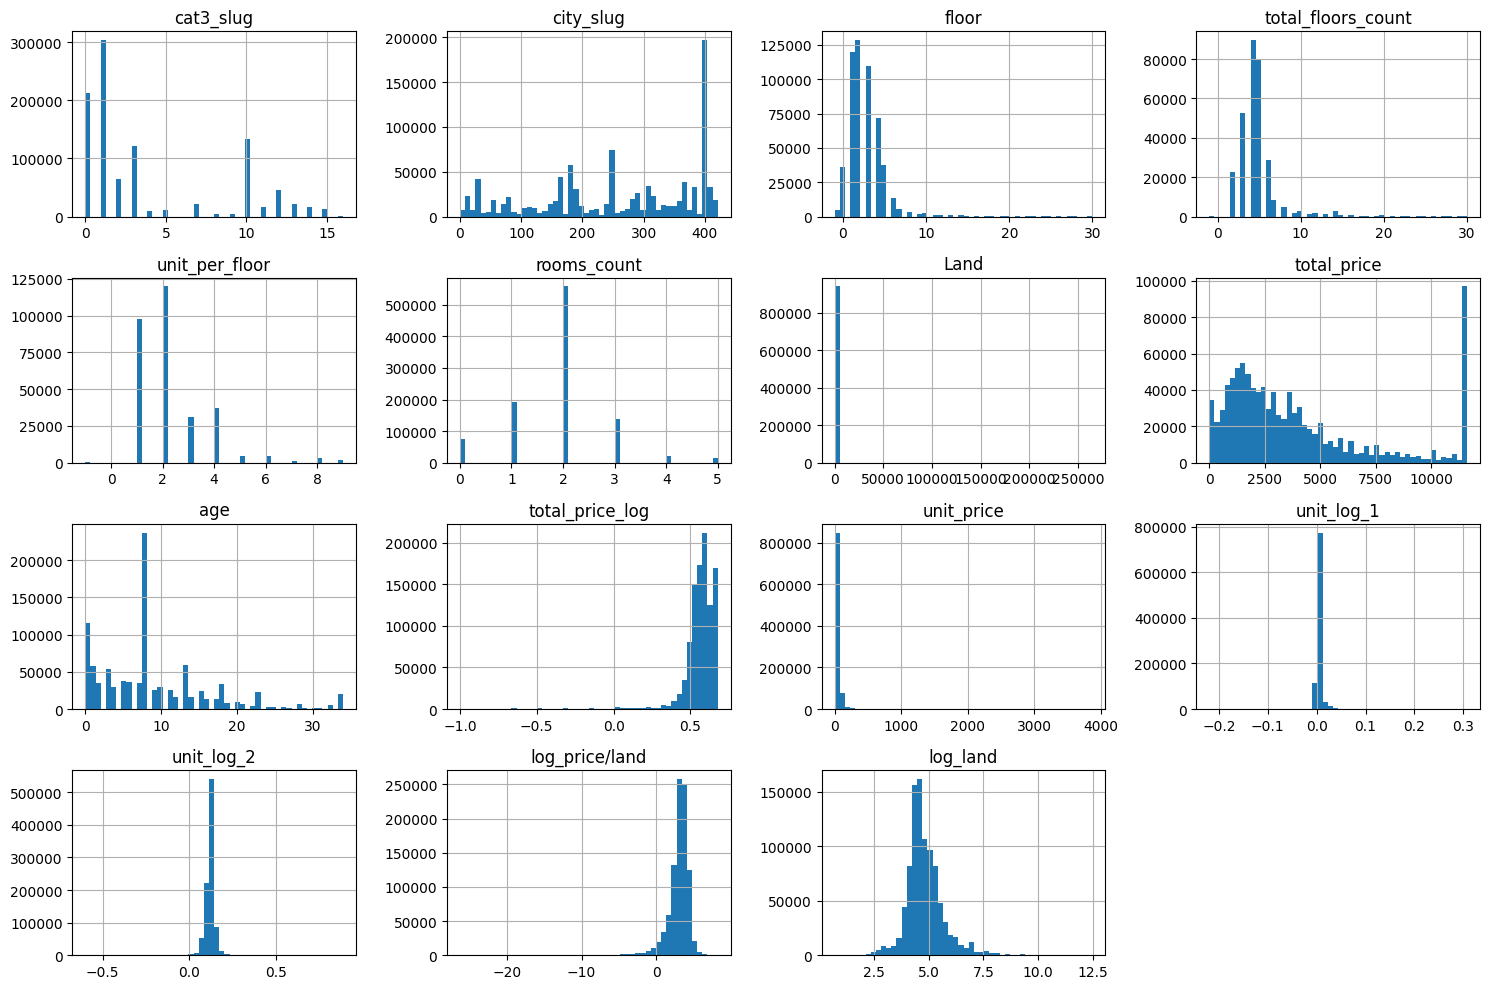

In [392]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# رسم هیستوگرام برای هر ستون عددی
df[numeric_cols].hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   cat3_slug           1000000 non-null  int64  
 1   city_slug           1000000 non-null  int64  
 2   floor               541748 non-null   float64
 3   total_floors_count  304352 non-null   float64
 4   unit_per_floor      302283 non-null   float64
 5   rooms_count         1000000 non-null  float64
 6   Land                942628 non-null   float64
 7   total_price         999879 non-null   float64
 8   age                 1000000 non-null  float64
 9   total_price_log     999879 non-null   float64
 10  unit_price          942576 non-null   float64
 11  unit_log_1          942576 non-null   float64
 12  unit_log_2          942576 non-null   float64
 13  log_price/land      942576 non-null   float64
 14  log_land            942628 non-null   float64
dtypes: float64(13), 

### deleting unneccessary columns

In [396]:
df_0 = df.copy()
# df_0 = df_0.drop(['total_price'], axis=1)

In [398]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   cat3_slug           1000000 non-null  int64  
 1   city_slug           1000000 non-null  int64  
 2   floor               541748 non-null   float64
 3   total_floors_count  304352 non-null   float64
 4   unit_per_floor      302283 non-null   float64
 5   rooms_count         1000000 non-null  float64
 6   Land                942628 non-null   float64
 7   total_price         999879 non-null   float64
 8   age                 1000000 non-null  float64
 9   total_price_log     999879 non-null   float64
 10  unit_price          942576 non-null   float64
 11  unit_log_1          942576 non-null   float64
 12  unit_log_2          942576 non-null   float64
 13  log_price/land      942576 non-null   float64
 14  log_land            942628 non-null   float64
dtypes: float64(13), 

### Creating model for estimate unit_price

#### Random forest

In [400]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

#### Data preperation

حذف کردن سطر هایی که مقدار قیمت واحد برای آنها وجود ندارد 

In [402]:
df_0 = df_0[~df_0['unit_price'].isna()]
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942576 entries, 1 to 999999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cat3_slug           942576 non-null  int64  
 1   city_slug           942576 non-null  int64  
 2   floor               528888 non-null  float64
 3   total_floors_count  299788 non-null  float64
 4   unit_per_floor      297675 non-null  float64
 5   rooms_count         942576 non-null  float64
 6   Land                942576 non-null  float64
 7   total_price         942576 non-null  float64
 8   age                 942576 non-null  float64
 9   total_price_log     942576 non-null  float64
 10  unit_price          942576 non-null  float64
 11  unit_log_1          942576 non-null  float64
 12  unit_log_2          942576 non-null  float64
 13  log_price/land      942576 non-null  float64
 14  log_land            942576 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 

In [404]:
numeric_features = ['cat3_slug','city_slug',"floor", "unit_per_floor", 'rooms_count','Land','log_land']
X = df_0[numeric_features]
y = df_0["unit_log_1"]


imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [406]:
rf_model = RandomForestRegressor(
    n_estimators=25,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [408]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)

R2 Score: 0.8842335314626606
MAE: 0.0007171576969301048
MSE: 4.75082768988007e-06


In [410]:
scores = cross_val_score(rf_model, X_imputed, y, cv=5, scoring='r2')
print(scores)

[0.88695561 0.88027451 0.88685777 0.8668338  0.85781994]


#### convert unit_log_1 to total_price

In [437]:
import numpy as np

df_0["reconstructed_total_price"] = np.exp(
    df_0["unit_log_1"] * df_0["Land"] * np.log(1e6)
)

In [414]:
df_0["reconstructed_total_price"].describe()

count    942576.000000
mean       3899.009001
std        3321.544618
min           0.000001
25%        1500.000000
50%        2800.000000
75%        5016.666667
max       11625.000000
Name: reconstructed_total_price, dtype: float64

In [416]:
df_0["total_price"].describe()

count    942576.000000
mean       3899.009001
std        3321.544618
min           0.000001
25%        1500.000000
50%        2800.000000
75%        5016.666667
max       11625.000000
Name: total_price, dtype: float64

### simple regression

In [420]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# نرمال‌سازی ویژگی‌ها
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_imputed)

# مدل
lin_reg = LinearRegression()

# Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores, rmse_scores = [], []

for train_index, test_index in kf.split(X_imputed):
    X_train, X_test = X_imputed[train_index], X_imputed[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print("R² scores:", r2_scores)
print("Mean R²:", np.mean(r2_scores))
print("RMSE scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))


R² scores: [0.51553954298951, 0.5055627563880998, 0.4921919388766167, 0.511434122156484, 0.49816736073040935]
Mean R²: 0.504579144228224
RMSE scores: [np.float64(0.004458845396605506), np.float64(0.004592780454496067), np.float64(0.004844808003859175), np.float64(0.004547462889365491), np.float64(0.0046824426112513215)]
Mean RMSE: 0.004625267871115513


#### DecisionTreeRegressor

In [431]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


dt_model = DecisionTreeRegressor(
    max_depth=25,        
    min_samples_split=2,   # حداقل تعداد نمونه برای split
    min_samples_leaf=10,    # حداقل تعداد نمونه در leaf
    random_state=42
)


dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)

R2 Score: 0.876762016461567
MAE: 0.0006809824271512006
MSE: 5.384316811929838e-06


In [433]:
y_train_pred = dt_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("Train R2:", r2_train)

Train R2: 0.9204758861802367
